<a href="https://colab.research.google.com/github/Guhan2348519/SPR_labs/blob/main/2348519_SPR_LAB4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Load a short speech signal (you can replace this with your own recorded signal)
filename = 'path_to_your_speech_file.wav'  # Replace with your own file
signal, sr = librosa.load(filename, sr=None)

# (b) LPC Analysis to extract coefficients
def lpc_analysis(signal, order):
    # Apply LPC using librosa
    lpc_coeffs = librosa.lpc(signal, order)
    return lpc_coeffs

# (c) Reconstruct the signal using LPC coefficients
def reconstruct_signal(lpc_coeffs, signal_length):
    # Reconstructing signal from LPC coefficients
    reconstructed_signal = np.zeros(signal_length)
    for n in range(len(reconstructed_signal)):
        reconstructed_signal[n] = np.dot(lpc_coeffs[1:], reconstructed_signal[n-len(lpc_coeffs[1:]):n][::-1]) - lpc_coeffs[0]
    return reconstructed_signal

# (d) Estimate formants from LPC coefficients
def estimate_formants(lpc_coeffs, sr):
    # Calculate roots of LPC polynomial
    roots = np.roots(lpc_coeffs)
    roots = [r for r in roots if np.imag(r) >= 0]
    angles = np.angle(roots)

    # Convert angles to frequencies (formants)
    formants = sorted(angles * (sr / (2 * np.pi)))
    return formants

# (e) Plot the formant frequencies on a frequency response plot
def plot_formants(lpc_coeffs, sr, formants):
    w, h = freqz(1, lpc_coeffs, worN=512, fs=sr)

    plt.figure(figsize=(10, 6))
    plt.plot(w, 20 * np.log10(np.abs(h)), label='Frequency response')
    for formant in formants:
        plt.axvline(formant, color='red', linestyle='--', label=f'Formant {round(formant, 2)} Hz')
    plt.title('LPC Frequency Response with Formants')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.legend()
    plt.show()

# Parameters
order = 16  # LPC order (adjust based on the signal)

# (b) Get LPC coefficients
lpc_coeffs = lpc_analysis(signal, order)

# (c) Reconstruct the signal
reconstructed_signal = reconstruct_signal(lpc_coeffs, len(signal))

# Plot original and reconstructed signals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(signal)
plt.title("Original Speech Signal")
plt.subplot(2, 1, 2)
plt.plot(reconstructed_signal)
plt.title("Reconstructed Speech Signal")
plt.show()

# (d) Estimate formants from LPC coefficients
formants = estimate_formants(lpc_coeffs, sr)

# Print estimated formants
print(f"Estimated Formants: {formants}")

# (e) Plot formant frequencies
plot_formants(lpc_coeffs, sr, formants)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.linalg import toeplitz

# Load or create a synthetic speech signal
def load_or_create_speech_signal():
    # Load a recorded speech signal or create a synthetic one
    fs, signal = wavfile.read('/content/harvardaudio.wav')

    # Convert to mono if the signal has more than one channel
    if len(signal.shape) > 1:
        signal = signal.mean(axis=1)  # Average the channels to convert to mono

    # Normalize signal
    signal = signal / np.max(np.abs(signal))
    return fs, signal

# Compute autocorrelation for a given lag
def autocorrelation(signal, order):
    autocorr = np.correlate(signal, signal, mode='full')
    center = len(signal) - 1
    return autocorr[center:center + order + 1]

# Solve for LPC coefficients using the autocorrelation method
def compute_lpc_coefficients(signal, order):
    R = autocorrelation(signal, order)
    R_matrix = toeplitz(R[:-1])  # Create Toeplitz matrix for autocorrelation
    rhs = -R[1:]
    # Solve the linear system for LPC coefficients
    lpc_coeffs = np.linalg.solve(R_matrix, rhs)
    return np.concatenate(([1], lpc_coeffs))  # Include a0 = 1

# Reconstruct the signal using LPC coefficients
def reconstruct_signal(signal, lpc_coeffs):
    reconstructed_signal = np.zeros(len(signal))
    for n in range(len(signal)):
        for k in range(1, len(lpc_coeffs)):
            if n - k >= 0:
                reconstructed_signal[n] -= lpc_coeffs[k] * signal[n - k]
    return reconstructed_signal

# Plot original and reconstructed signals
def plot_signals(original, reconstructed, fs):
    t = np.arange(len(original)) / fs
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.title("Original Signal")
    plt.plot(t, original)
    plt.subplot(2, 1, 2)
    plt.title("Reconstructed Signal")
    plt.plot(t, reconstructed)
    plt.tight_layout()
    plt.show()

# Main execution
fs, speech_signal = load_or_create_speech_signal()

# Define LPC order (12 is typical for speech signals)
order = 12

# Perform LPC analysis to get coefficients
lpc_coeffs = compute_lpc_coefficients(speech_signal, order)

# Reconstruct the signal from LPC coefficients
reconstructed_signal = reconstruct_signal(speech_signal, lpc_coeffs)

# Plot original and reconstructed signals
plot_signals(speech_signal, reconstructed_signal, fs)

# Display LPC coefficients
print("LPC Coefficients:", lpc_coeffs)
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.linalg import toeplitz

# Load or create a synthetic speech signal
def load_or_create_speech_signal():
    # Load a recorded speech signal or create a synthetic one
    fs, signal = wavfile.read('/content/harvardaudio.wav')

    # Convert to mono if the signal has more than one channel
    if len(signal.shape) > 1:
        signal = signal.mean(axis=1)  # Average the channels to convert to mono

    # Normalize signal
    signal = signal / np.max(np.abs(signal))
    return fs, signal

# Compute autocorrelation for a given lag
def autocorrelation(signal, order):
    autocorr = np.correlate(signal, signal, mode='full')
    center = len(signal) - 1
    return autocorr[center:center + order + 1]

# Solve for LPC coefficients using the autocorrelation method
def compute_lpc_coefficients(signal, order):
    R = autocorrelation(signal, order)
    R_matrix = toeplitz(R[:-1])  # Create Toeplitz matrix for autocorrelation
    rhs = -R[1:]
    # Solve the linear system for LPC coefficients
    lpc_coeffs = np.linalg.solve(R_matrix, rhs)
    return np.concatenate(([1], lpc_coeffs))  # Include a0 = 1

# Reconstruct the signal using LPC coefficients
def reconstruct_signal(signal, lpc_coeffs):
    reconstructed_signal = np.zeros(len(signal))
    for n in range(len(signal)):
        for k in range(1, len(lpc_coeffs)):
            if n - k >= 0:
                reconstructed_signal[n] -= lpc_coeffs[k] * signal[n - k]
    return reconstructed_signal

# Plot original and reconstructed signals
def plot_signals(original, reconstructed, fs):
    t = np.arange(len(original)) / fs
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.title("Original Signal")
    plt.plot(t, original)
    plt.subplot(2, 1, 2)
    plt.title("Reconstructed Signal")
    plt.plot(t, reconstructed)
    plt.tight_layout()
    plt.show()

# Main execution
fs, speech_signal = load_or_create_speech_signal()

# Define LPC order (12 is typical for speech signals)
order = 12

# Perform LPC analysis to get coefficients
lpc_coeffs = compute_lpc_coefficients(speech_signal, order)

# Reconstruct the signal from LPC coefficients
reconstructed_signal = reconstruct_signal(speech_signal, lpc_coeffs)

# Plot original and reconstructed signals
plot_signals(speech_signal, reconstructed_signal, fs)

# Display LPC coefficients
print("LPC Coefficients:", lpc_coeffs)


<ipython-input-5-600ef7e5627f>:9: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, signal = wavfile.read('/content/harvardaudio.wav')


<ipython-input-2-396274e460da>:10: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, signal = wavfile.read('/content/harvardaudio.wav')


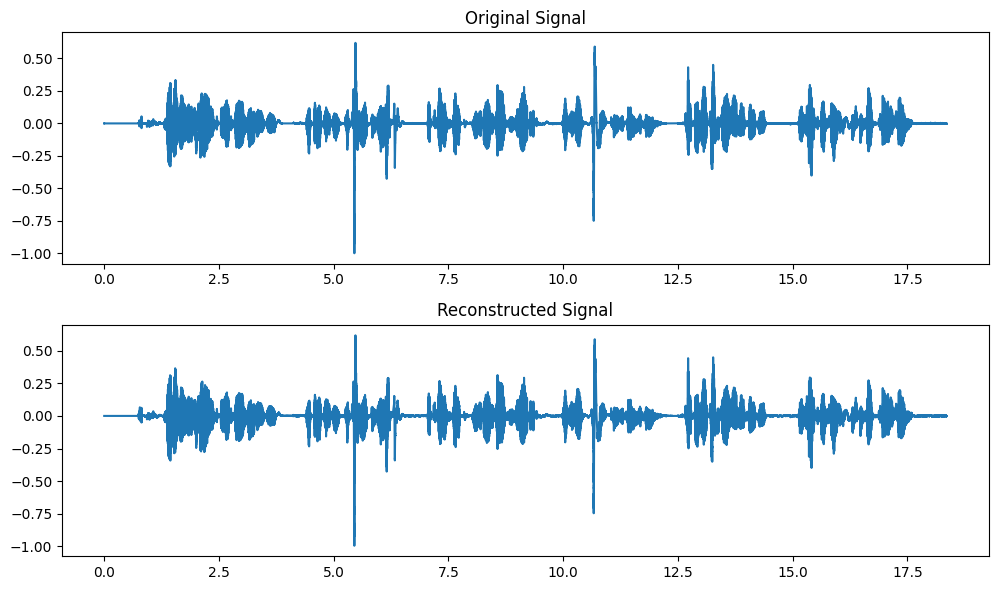

LPC Coefficients: [ 1.         -2.64228176  3.68547629 -3.96254985  3.77834705 -3.54226355
  3.10758139 -2.66852277  2.14132517 -1.48092623  0.88811299 -0.39939682
  0.10201177]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.linalg import toeplitz
import warnings


# Load or create a synthetic speech signal
def load_or_create_speech_signal():
    fs, signal = wavfile.read('/content/harvardaudio.wav')
    # Convert to mono if the signal has more than one channel
    if len(signal.shape) > 1:
        signal = signal.mean(axis=1)  # Average the channels to convert to mono
    # Normalize signal
    signal = signal / np.max(np.abs(signal))
    return fs, signal

# Compute autocorrelation for a given lag
def autocorrelation(signal, order):
    autocorr = np.correlate(signal, signal, mode='full')
    center = len(signal) - 1
    return autocorr[center:center + order + 1]

# Solve for LPC coefficients using the autocorrelation method
def compute_lpc_coefficients(signal, order):
    R = autocorrelation(signal, order)
    R_matrix = toeplitz(R[:-1])  # Create Toeplitz matrix for autocorrelation
    rhs = -R[1:]
    # Solve the linear system for LPC coefficients
    lpc_coeffs = np.linalg.solve(R_matrix, rhs)
    return np.concatenate(([1], lpc_coeffs))  # Include a0 = 1

# Reconstruct the signal using LPC coefficients
def reconstruct_signal(signal, lpc_coeffs):
    reconstructed_signal = np.zeros(len(signal))
    for n in range(len(signal)):
        for k in range(1, len(lpc_coeffs)):
            if n - k >= 0:
                reconstructed_signal[n] -= lpc_coeffs[k] * signal[n - k]
    return reconstructed_signal

# Plot original and reconstructed signals
def plot_signals(original, reconstructed, fs):
    t = np.arange(len(original)) / fs
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.title("Original Signal")
    plt.plot(t, original)
    plt.subplot(2, 1, 2)
    plt.title("Reconstructed Signal")
    plt.plot(t, reconstructed)
    plt.tight_layout()
    plt.show()

# Main execution
fs, speech_signal = load_or_create_speech_signal()

# Define LPC order (12 is typical for speech signals)
order = 12

# Perform LPC analysis to get coefficients
lpc_coeffs = compute_lpc_coefficients(speech_signal, order)

# Reconstruct the signal from LPC coefficients
reconstructed_signal = reconstruct_signal(speech_signal, lpc_coeffs)

# Plot original and reconstructed signals
plot_signals(speech_signal, reconstructed_signal, fs)

# Display LPC coefficients
print("LPC Coefficients:", lpc_coeffs)


<ipython-input-8-eee16deb21e7>:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, signal = wavfile.read(filepath)


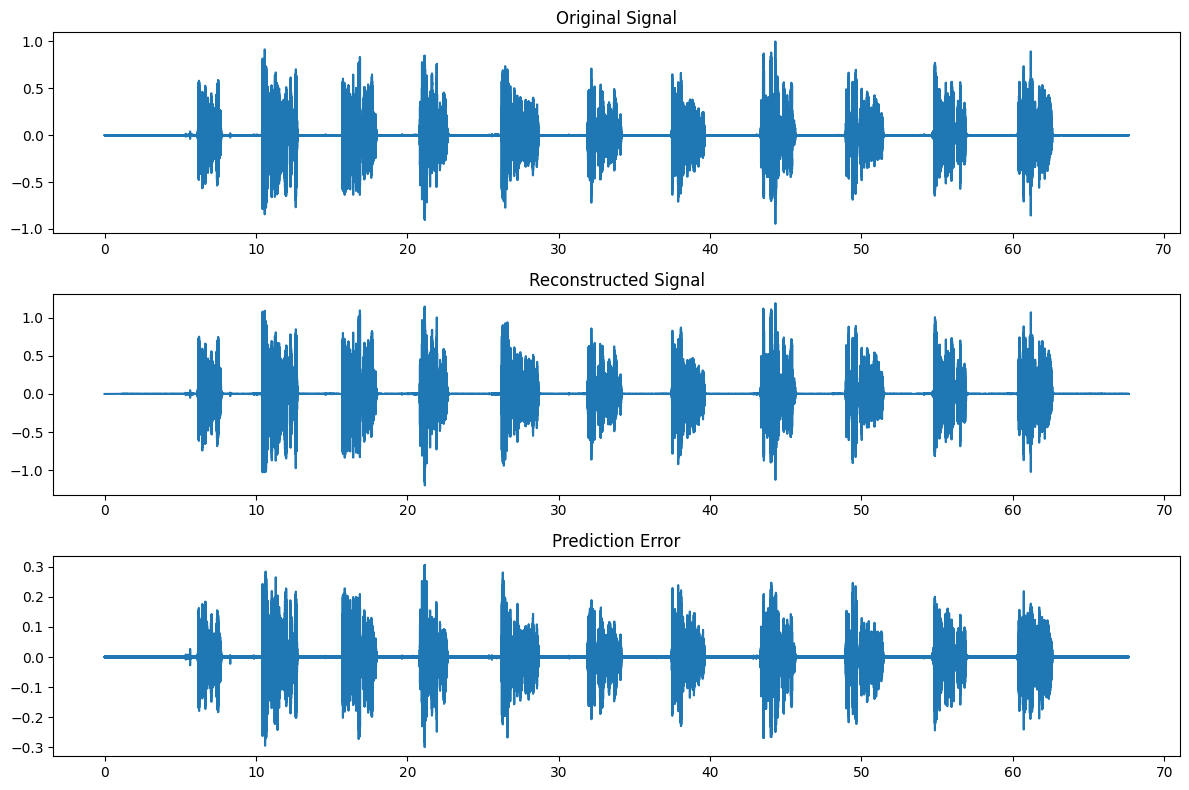

LPC Coefficients (first frame): [ 1.          0.16573222 -0.04684914 -0.06672858 -0.04585422 -0.07284953
 -0.13923284 -0.08761668 -0.09265926 -0.06611855 -0.03086263 -0.07893462
 -0.06420918]


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.linalg import toeplitz

# Load a speech signal from a .wav file
def load_speech_signal(filepath):
    fs, signal = wavfile.read(filepath)

    # Convert to mono if the signal has multiple channels
    if len(signal.shape) > 1:
        signal = signal.mean(axis=1)

    # Normalize signal
    signal = signal / np.max(np.abs(signal))
    return fs, signal

# Frame the signal with overlapping windows
def frame_signal(signal, frame_size, overlap):
    hop_size = frame_size - overlap
    frames = []
    for i in range(0, len(signal) - frame_size, hop_size):
        frames.append(signal[i:i + frame_size])
    return np.array(frames)

# Compute autocorrelation for LPC
def autocorrelation(signal, order):
    autocorr = np.correlate(signal, signal, mode='full')
    center = len(signal) - 1
    return autocorr[center:center + order + 1]

# Compute LPC coefficients for each frame
def compute_lpc_coefficients(frames, order):
    lpc_coeffs = []
    for frame in frames:
        R = autocorrelation(frame, order)
        R_matrix = toeplitz(R[:-1])
        rhs = -R[1:]
        lpc_frame = np.linalg.solve(R_matrix, rhs)
        lpc_coeffs.append(np.concatenate(([1], lpc_frame)))
    return np.array(lpc_coeffs)

# Reconstruct each frame with overlap handling
def reconstruct_signal(frames, lpc_coeffs, frame_size, overlap):
    hop_size = frame_size - overlap
    signal_length = hop_size * (len(frames) - 1) + frame_size
    reconstructed_signal = np.zeros(signal_length)
    window = np.hanning(frame_size)  # Window to smooth overlapping regions

    for i, (frame, coeffs) in enumerate(zip(frames, lpc_coeffs)):
        recon_frame = np.zeros(len(frame))
        for n in range(len(frame)):
            recon_frame[n] = sum(-coeffs[k] * frame[n - k] for k in range(1, len(coeffs)) if n - k >= 0)

        # Add the frame with overlap handling
        start = i * hop_size
        reconstructed_signal[start:start + frame_size] += recon_frame * window

    return reconstructed_signal

# Plot original, reconstructed, and error signals
def plot_signals(original, reconstructed, fs):
    t = np.arange(len(original)) / fs
    plt.figure(figsize=(12, 8))

    plt.subplot(3, 1, 1)
    plt.plot(t, original)
    plt.title("Original Signal")

    plt.subplot(3, 1, 2)
    plt.plot(t[:len(reconstructed)], reconstructed)
    plt.title("Reconstructed Signal")

    plt.subplot(3, 1, 3)
    plt.plot(t[:len(reconstructed)], original[:len(reconstructed)] - reconstructed)
    plt.title("Prediction Error")

    plt.tight_layout()
    plt.show()

# Main execution
filepath = '/content/Harvard list 01.wav'
fs, speech_signal = load_speech_signal(filepath)

# Define LPC parameters
frame_duration = 0.025  # 25 ms
overlap_duration = 0.015  # 15 ms
order = 12  # LPC order

# Convert frame and overlap durations to samples
frame_size = int(fs * frame_duration)
overlap_size = int(fs * overlap_duration)

# Frame the signal and compute LPC coefficients
frames = frame_signal(speech_signal, frame_size, overlap_size)
lpc_coeffs = compute_lpc_coefficients(frames, order)

# Reconstruct the signal from LPC coefficients with overlap handling
reconstructed_signal = reconstruct_signal(frames, lpc_coeffs, frame_size, overlap_size)

# Plot original and reconstructed signals
plot_signals(speech_signal, reconstructed_signal, fs)

# Display a sample of LPC coefficients for inspection
print("LPC Coefficients (first frame):", lpc_coeffs[0])
